<a href="https://colab.research.google.com/github/SayaliJadhav2109/SCT_TrackCode_Task_1/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 2. Load data (you’ve already uploaded the file)
df = pd.read_csv('/content/sample_data/social_ads.csv')

In [ ]:
# 3. Inspect and clean column names
df.columns = df.columns.str.strip().str.lower()
print("Columns:", df.columns.tolist())
print(df.head())


Columns: ['age', 'estimatedsalary', 'purchased']
   age  estimatedsalary  purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [ ]:
X = df.drop('purchased', axis=1)
y = df['purchased']

In [ ]:

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Train/Test sizes:", X_train.shape, X_test.shape)


Train/Test sizes: (280, 2) (120, 2)


In [ ]:

# 7. Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# 8. Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        73
           1       0.81      0.81      0.81        47

    accuracy                           0.85       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.85      0.85      0.85       120



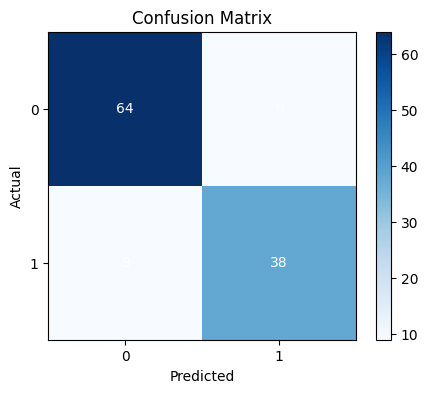

In [ ]:
# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix")
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0,1], ['0','1'])
plt.yticks([0,1], ['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i,j], ha='center', va='center', color='white')
plt.show()

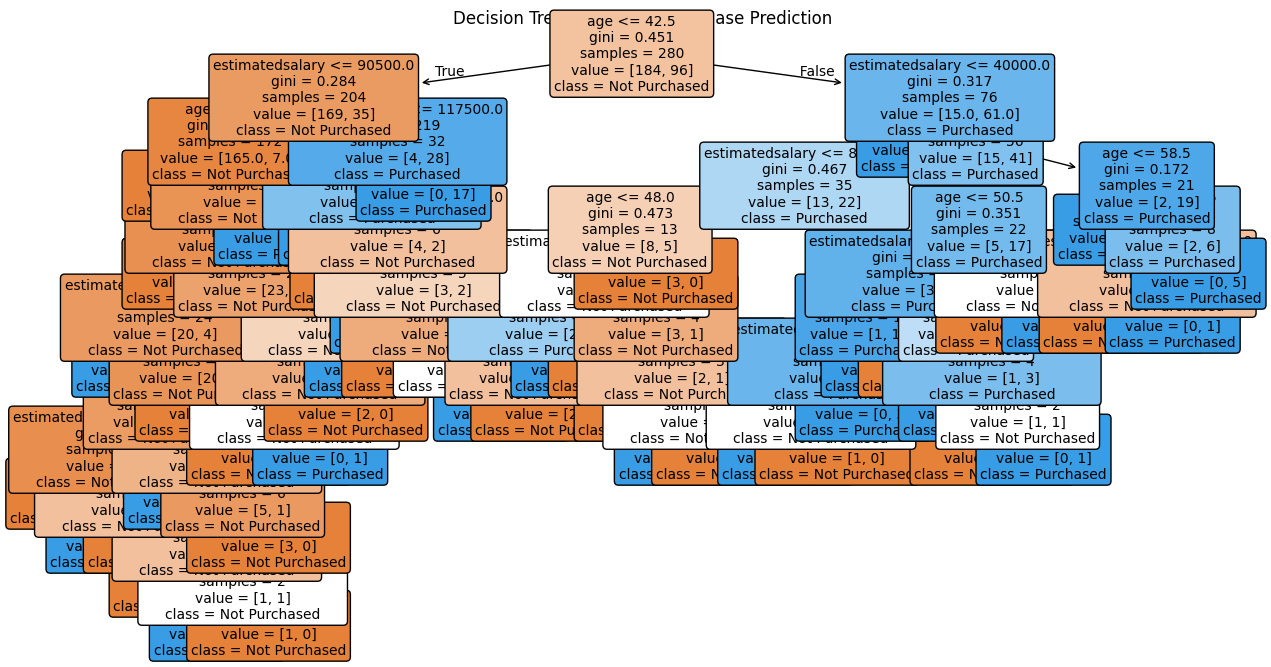

In [ ]:
# 9. Visualize tree
plt.figure(figsize=(15,8))
plot_tree(
    model, feature_names=X.columns,
    class_names=['Not Purchased','Purchased'],
    filled=True, rounded=True, fontsize=10
)
plt.title("Decision Tree – Customer Purchase Prediction")
plt.show()